In [8]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())

###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, C. Cooper, G.F. Forsyth, A. Krishnan.

# Phugoid Motion

Look at this video showing a Cessna single-engine airplane in phugoid motion:

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('ysdU4mnRYdM')

That doesn't look too good! What's happening? 

It can get a lot worse when an aircraft enters one of these modes that is unstable. For example, one of [NASA's Helios Solar Powered Aircraft](http://www.nasa.gov/centers/dryden/history/pastprojects/Helios/) prototype broke up in mid air due to extreme phugoid oscillations!

Helios was a proof-of-concept solar electric-powered flying wing that broke the world altitude record for a non-rocket-powered aircraft in August 2001. But in June 26, 2003, it broke something else. The aircraft entered phugoid motion after encountering turbulence near the Hawaiian Island of Kauai. The high speed in the oscillatory movement exceeded the design limits, and it ended up wrecked in the Pacific Ocean. Luckily, the Helios was remotely operated, and nobody got hurt.

## The physics of phugoids

The phugoid oscillation has the aircraft pitching up and down, as it decelerates and accelerates. The trajectory might look like a sinusoid, as in the figure below. The assumption is that the forward velocity of the aircraft, $v$, varies in such a way that the angle of attack remains (nearly) constant, which means that we can assume a constant lift coefficient.

Welcome to [**"Practical Numerical Methods with Python!"**](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about) This course is a collaborative, online, open education project, where we aim to give a foundation in scientific computing. The focus is on numerical solution of problems modeled by ordinary and partial differential equations.

This IPython Notebook introduces the problem we'll be studying in the **first module** of the course: the _phugoid model of glider flight_. We'll start with some background, explaining the physics, and working out the mathematical model. 

First, we'll look at an idealized motion where there is no drag, resulting in a simple harmonic motion. We can plot some interesting trajectories that will pique your imagination. In the next notebook, you'll learn to numerically integrate the differential equation using Euler's method.

Let's talk about angles (figures from [5], [6]):

The _angle of attack_ $\alpha$ is the the angle between the wing chord and the flight path.

![Image](./figures/forces_airfoil.gif)
#### Figure 1A. Angle of attack.

The _glide angle_ or _flight path angle_, θ, is the angle between the flight path or _trajectory_ traced out by the tip of the nose of the aircraft and the horizontal, positive up.

The _pitch angle_ $\psi$ is the angle between the aircraft's longitudinal axis and the horizontal.  We measure the pitch angle as positive when the aircraft's nose is pointing up. 

![Image](./figures/aoa5.jpg)
#### Figure 1B. Glide, pitch and attack angles.

The term "phugoid" is used in aeronautics to refer to a motion pattern where an aircraft oscillates up and down —nose-up and climb, then nose-down and descend— around an equilibrium trajectory.  The aircraft oscillates in altitude, speed and pitch, with only small (neglected) variations in the angle of attack, as it repeatedly exchanges kinetic and potential energy.

A low-amplitude phugoid motion can be just a nuisance, as the aircraft does not exceed the stall angle of attack and nothing bad happens. But the mode can also be unstable leading to a stall or even a loop!

![Image](./figures/oscillatory_trajectory_psi.png)
#### Figure 1C. Trajectory of an aircraft in phugoid motion.

In the descending portion of the trajectory, the aircraft's velocity increases as it proceeds from a peak to the minimum height—gaining kinetic energy at the expense of potential energy. The contrary happens in the upward segment, as its velocity decreases there. In the portion of the trajectory below the center-line, where it curves upwards, the pitch angle $\psi$ is increasing: $\dot{\psi}>0$. And where the trajectory curves down, the pitch angle is decreasing: $\dot{\psi}<0$, as shown in the figure.

Let's remind ourselves of the forces affecting an aircraft in a downward glide. Look at the figure below: we show the flight path, the forces on the glider (no thrust), and the flight path angle $\theta$.

![Image](./figures/glider_forces_theta.png)
#### Figure 2A. Forces on a glider.

The force of lift, $L$ —created by the airflow around the wings— is perpendicular to the trajectory, and the force of drag, $D$, is parallel to the trajectory. Both forces are expressed in terms of coefficients of lift and drag, $C_L$ and $C_D$, respectively, that depend on the wing design and _angle of attack_—the angle between the wing chord and the flight path.  (These terms come from the field of airplane aerodynamics.)

Lift and drag are proportional to a surface area, $S$, and the dynamic pressure: $1/2 \rho v^2$, where $\rho$ is the density of air, and $v$ the forward velocity of the aircraft. The equations for lift and drag are:

$$\begin{eqnarray}
L &=& C_L S \times \frac{1}{2} \rho v^2 \\
D &=& C_D S \times \frac{1}{2} \rho v^2
\end{eqnarray}$$

Let $W$ repesent the weight of the glider.  If the glider were in equilibrium, the forces would balance each other. As we can see in Figure 3, the component of $W$ in the direction of flight is $W \sin \theta$, and the component of $W$ perpendicular to flight path is $W \cos \theta$:

![Image](./figures/revcrs3.gif)

So, we can equate the forces in the directions perpendicular and parallel to the trajectory as follows:

$$\begin{equation}
L = W \cos \theta \quad \text{and} \quad D = W \sin \theta
\end{equation}$$

In the figure the angle $\theta$ is the glide angle, formed between the direction of motion and the horizontal. We are not bothered with the _sign_ of the angle, because we draw a free-body diagram and take the direction of the forces into account in writing our balance equations. But later on, we will need to be careful with the sign of the angles. It can cause you a real headache to keep this straight, so be patient!

It looks like we've set this up to do a little bit of mathematics. Are you ready?

But before, a short glimpse of the history.

## Lanchester's Aerodonetics

"Phugoid theory" was first described by the British engineer Frederick W. Lanchester in _"Aerodonetics"_ (1909). This book is so old that it is now in the public domain, so you can actually download [from Google Books](http://books.google.com/books?id=6hxDAAAAIAAJ&dq=%22phugoid%20theory%20deals%20with%20the%20longitudinal%20stability%22&pg=PA37#v=onepage&q=%22phugoid%20theory%20deals%20with%20the%20longitudinal%20stability%22&f=false) a PDF file of a scan, or read it online. 

Lanchester defines phugoid theory as the study of longitudinal stability of a flying machine (aerodone). He first considered the simplification where drag and moment of inertia are neglected. Then he included these effects, obtaining an equation of stability. In addition to describing many experiments by himself and others, Lanchester also reports on _"numerical work ... done by the aid of an ordinary 25-cm slide rule."_ Go figure!

### Ideal case of zero drag

In this section, we follow the derivation given by Milne-Thompson (1966), which we find a little bit easier than that of the original in "Aerodonetics"!

An aircraft flying in a steady, straight horizontal flight has a lift equal to its weight. The velocity in this condition is sometimes called _trim velocity_ ("trim" is what pilots do to set the controls to just stay in a steady flight). Let's use $v_\text{trim}$ for the trim velocity, and from $L=W$ and equation (1) deduce that:

$$\begin{equation}
W = C_L S \times\frac{1}{2} \rho v_\text{trim}^2
\end{equation}$$

The weight $W$ is constant for the aircraft, but the lift at any other flight condition depends on the flight speed, $v$. We can use the expression for the weight in terms of $v_\text{trim}$ to obtain the ratio $L/W$ at any other flight velocity, as follows:

$$\begin{equation}
\frac{L}{W}= \frac{v^2}{v_\text{trim}^2}
\end{equation}$$

Imagine that the aircraft experienced a little upset, a wind gust, and it finds itself off the "trim" level, in a curved path with an instantaneous glide path angle $\theta$. In the sketch below, we exaggerate the curved trajectory of flight to help you visualize what we'll do next.

![Image](./figures/glider_forces_nodrag.png)
#### Figure 4. Curved trajectory of the aircraft going up.

Recall that the *radius of curvature* [9] is the radius of the *osculating circle* [10] which best rests in the curved line formed by the flight path.  Suppose the coordinates of the flight path $P(t)=(x(t),y(t))$ as a function of time are given by component functions $x(t)$, $y(t)$ and $P(t)$ is *regular* in the sense that $\dot{x}\ddot{y} \neq \dot{y}\ddot{x}$.  Then

$$\begin{equation}R(P)=\big|\frac{{(\dot{x}^2+\dot{y}^2)}^\frac{3}{2}}{\dot{x}\ddot{y}-\dot{y}\ddot{x}}\big|\end{equation}$$


A balance of forces now has to take into account that our reference frame is moving with the aircraft, in a rotating frame: we have a _centripetal force_ $F_c$. [8]  

Recall that the *centripetal acceleration*, where $R$ is the radius of curvature of the flight path, is [11]

$$\begin{equation}a_c=\frac{v^2}{R}\end{equation}$$

Let $g$ be the acceleration of gravity.  Recall from the definition of weight $W$ that, for some mass $m$ [12]

$$\begin{equation}W=m g\end{equation}$$

so obviously

$$\begin{equation}m = \frac{W}{g}\end{equation}$$

 Recall Newton's 2nd Law of Motion [13]
 
 $$\begin{equation}F_c=m a_c\end{equation}$$

The balance of force in the direction of lift is the lift less the component of weight in the direction of lift:

$$\begin{equation}
F_c= m a_c =\frac{W}{g} \frac{v^2}{R}= L- W \cos \theta 
\end{equation}$$

Rearrange this by dividing the equation by the weight:

$$\begin{equation}
\frac{v^2}{g R}= \frac{L}{W}-\cos \theta 
\end{equation}$$

Then use the expression we found for $L/W$ in equation (5), giving the **phugoid equation**

$$\begin{equation}
\frac{v^2}{v_\text{trim}^2}-\cos \theta = \frac{v^2}{g R}
\end{equation}$$

Recall that we simplified the problem assuming that there is no friction, which means that the total energy is constant (the lift does no work). If $z$ represents the depth below a reference horizontal line, the energy per unit mass is (kinetic plus potential energy):

$$\begin{equation}
\frac{1}{2}v^2-g z = \text{constant}
\end{equation}$$

To get rid of that pesky constant, we can choose the reference horizontal line at the level that makes the constant energy equal to zero, so 

$$\begin{equation}v^2 = 2 g z
\quad \text{and} \quad 
v_\text{trim}^2 = 2 g z_\text{trim}
\end{equation}$$

for some constant $z_\text{trim}$.

That helps us re-write the phugoid equation in terms of $z$ as follows:

$$
\frac{v^2}{v_\text{trim}^2}-\cos \theta = \frac{2 g z}{2 g z_\text{trim}}-\cos \theta = \frac{v^2}{g R} = \frac{2 g z}{g R}
$$

Simplifying,


$$\begin{equation}
\frac{z}{z_\text{trim}}-\cos \theta = \frac{2z}{R}
\end{equation}$$

Now let $ds$ represent a small arc-length of the trajectory. We can write 

$$\begin{equation}
\frac{1}{R} = \frac{d\theta}{ds} \quad \text{and}\quad  \sin\theta = -\frac{dz}{ds}
\end{equation}$$

Employing the chain rule of calculus,

$$\begin{equation}
\frac{1}{R} = \frac{d\theta}{ds} = \frac{dz}{ds}\frac{d\theta}{dz} = -\sin \theta\frac{d\theta}{dz}
\end{equation}$$

Multiply equation (16) by $\frac{1}{2\sqrt{z}}$ to get:

$$\begin{equation}
\frac{\sqrt{z}}{2z_\text{trim}} - \frac{\cos\theta}{2\sqrt{z}} = \frac{\sqrt{z}}{R}
\end{equation}$$

Substituting for $1/R$ on the right hand side and bringing the cosine term over to the right, we get:

$$\begin{equation}
\frac{\sqrt{z}}{2z_\text{trim}} = \frac{\cos \theta}{2 \sqrt{z}} - \sqrt{z} \sin \theta \frac{d\theta}{dz}
\end{equation}$$

The right-hand-side is an exact derivative! We can rewrite it as:

$$\begin{equation}
\frac{d}{dz} \left(\sqrt{z}\cos\theta \right) = \frac{\sqrt{z}}{2z_\text{trim}}
\end{equation}$$

Integrating this equation, we add an arbitrary constant, chosen as $C\sqrt{z_\text{trim}}$ which (after dividing through by $\sqrt{z}$) gives:

$$\begin{equation}
\cos \theta = \frac{1}{3}\frac{z}{z_\text{trim}} + C\sqrt{\frac{z_\text{trim}}{z}}
\end{equation}$$

Note also from this that, for a particular $\theta,z,z_\text{trim}$,

$$\begin{equation}
C_{\theta,z,z_\text{trim}} = \frac{\cos \theta -\frac{1}{3}\frac{z}{z_\text{trim}}}{\sqrt{\frac{z_\text{trim}}{z}}}
\end{equation}$$

Combining equations (16) and (22),

$$\begin{equation}\frac{z}{z_\text{trim}}-\frac{2z}{R} = \frac{1}{3}\frac{z}{z_\text{trim}} + C\sqrt{\frac{z_\text{trim}}{z}}\end{equation}$$

Multiply by $\frac{z_\text{trim}}{z}$ and simplify giving

$$\begin{equation}\frac{z_\text{trim}}{R} = \frac{1}{3} - \frac{C}{2}\sqrt{\frac{z_\text{trim}^3}{z^3}}\end{equation}$$

Note also from this that, at a particular $C, z_\text{trim},z$,

$$\begin{equation}
R_{C, z_\text{trim},z} = \frac{z_\text{trim}}{\frac{1}{3} - \frac{C}{2}\sqrt{\frac{z_\text{trim}^3}{z^3}}}
\end{equation}$$

Make sure you have followed the derivation, and perhaps write it out on paper!

## Phugoid Curves

Equation (24) is non-linear, which usually means we are hard-pressed to write a clean expression for the variable of interest, $z$.  In fact, Lanchester himself said that he was unable to _"reduce this expression to a form suitable for co-ordinate plotting."_ 

But Lanchester _was_ able to plot a suitable approximation of the phugoid flight path using what he called the "trammel" method.  If you're interested in seeing how he did it, his explanation begins on page [48 of Aerodonetics](http://books.google.com/books?id=6hxDAAAAIAAJ&pg=PA49&lpg=PA48&dq=aerodonetics+the+use+of+the+trammel&source=bl&ots=lB6EVKYQuT&sig=aVE2kiDWZoWftaWczMIrcYftMOs&hl=en&sa=X&ei=gTD_U82fGYjzgwT3moGwCQ&ved=0CCAQ6AEwAA#v=onepage&q=aerodonetics%20the%20use%20of%20the%20trammel&f=false).  It's a trip.

Lanchester used Equations (22) and (24) to solve for the constant $C$ and the radius of curvature $R$ and then iteratively plotted small arcs of the phugoid path. By hand.

We wrote a neat little code that duplicates the manual trammel method.  We give a brief explanation here.

Consider a vector $v$ drawn from point $(x_0,y_0)$ to point $(x,y)$.  Suppose we want to rotate the tip $(x,y)$ of this vector about the center $(x_0,y_0)$ through angle $\theta$.  Let

$$\begin{eqnarray}
\Delta x=x-x_0 \\
\Delta y=y-y_0
\end{eqnarray}$$

and

$$\begin{eqnarray}
x^\prime=\Delta x \cos\theta+\Delta y \sin\theta \\
y' = -\Delta x \sin\theta+\Delta y \cos \theta
\end{eqnarray}$$

then

$$\begin{eqnarray}
\text{rotate}((x,y),(x_0,y_0),\theta)=(x_0+x',y_0+y')
\end{eqnarray}$$


Now let 
* $z_\text{trim}$ be the trim height
* $z_0$ be our current height
* $x_0=0$ be our current horizontal position
* $P_i=(x_i,z_i)$ be the position of the tip of the nose of our aircraft at timestep $i$ for $0\leq i$.
* $\theta_0$ be our current flight path angle
* $C=C_{\theta_0,z_0,z_\text{trim}}$
* $ds=1$ be the increment of movement along the flight path

Then for $i>0$:
* $N_i=(\cos (\theta+\frac{\pi}{2}), -\sin(\theta+\frac{\pi}{2})$
* $R_i= R_{C, z_\text{trim},z_{i-1}}$
* $O_i=P_{i-1}+R_i N_i$
* $d \theta_i=\frac{ds}{R_i}$
* $P_i=\text{rotate}(P_{i-1},O_i,d \theta_i)$


### Plotting the flight path

As we mentioned, we wrote a Python code to reproduce programmatically what Lanchester did graphically. Here's a neat feature of IPython Notebooks: you can run external programs with the magical keyword ... wait for it ... `run`. And the jargon of IPython _is_ to call this "magic." In fact, there are a bunch of [magic functions](http://ipython.org/ipython-doc/dev/interactive/tutorial.html) that you will learn about. They will make you a happy camper.

Let's do it:

In [10]:
%run phugoid.py
%matplotlib inline

This code cell loaded our simulated-trammel code, `phugoid.py`. The code defined a function for you in the background, called `plot_flight_path`, taking three inputs: $z_\text{trim}$, $z$ and $\theta$.  

Look again at Equation (15), where we take the positive square root. There are several possibilities, depending on the value that the constant $C$ takes. 

* There are no physical solutions for $C>2/3$, because it would result in $\cos\theta>1$. 

* If $C=2/3$, then the solution is a horizontal straight line, because $\cos\theta=1$, $\theta=0$ and $R=\infty$.

* Any value of $C$ for which $0 < C < \frac{2}{3}$ will produce "trochoidal"-like paths.  What does this look like? Let's use our custom function `plot_flight_path` to find out!

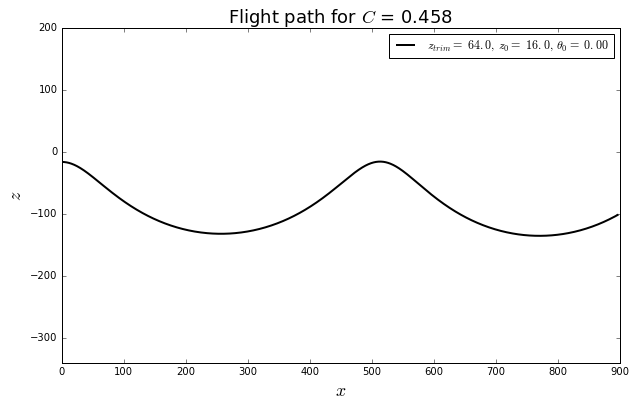

In [11]:
#zt = 64, z = 16, theta=0
plot_flight_path(64, 16, 0)

Cool!  Note that the plot title tells us what the calculated value of $C$ was for our input conditions.  We have a value of $C$ between $0$ and $\frac{2}{3}$ and our path is trochoidal, like we announced it would be.

* For negative values of $C$, the resultant flight path consists of a series of loops.  Let's try it out!

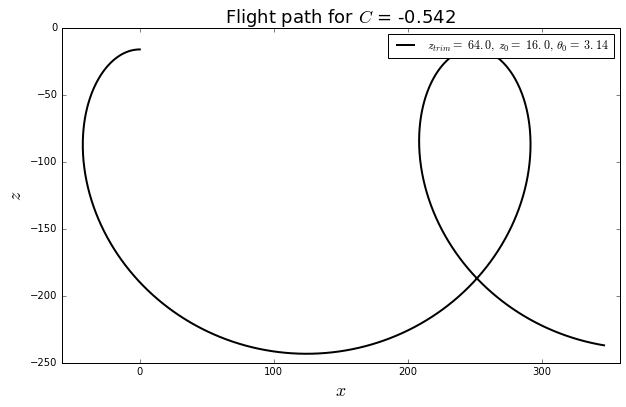

In [12]:
plot_flight_path(64,16,numpy.pi)

You can play around with the input values and see what kind of behavior results.  Just note that any value of $C > \frac{2}{3}$ will result in $\cos \theta > 1$, which doesn't exist.  Python will probably throw a few errors if you hit that condition, but just try again!

* The last case is $C = 0$.  Take another look at Equation (16) and plug in $C = 0$, what should happen? It looks like it will just reduce to 

$$R = 3z_\text{trim}$$

It's a constant radius of curvature!  In fact, this solution is a series of semi-circles, with a cusp between them. One way to force $C = 0$ that we can figure out from Equation (15), is to make:


$$z = 3z_\text{trim}\ \ \ ,\ \ \  \theta = 0$$

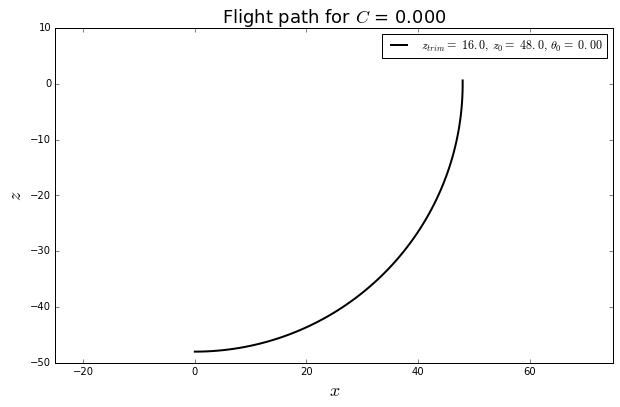

In [13]:
plot_flight_path(16,48,0.)

That looks an awful lot like a quarter circle.  And what's the radius of the arc?  It's $$r = 48 = 3z_t.$$

We can also get a semi-circle out of our simulated trammel by changing to another configuration where $C$ is (near) zero. Here's one example:

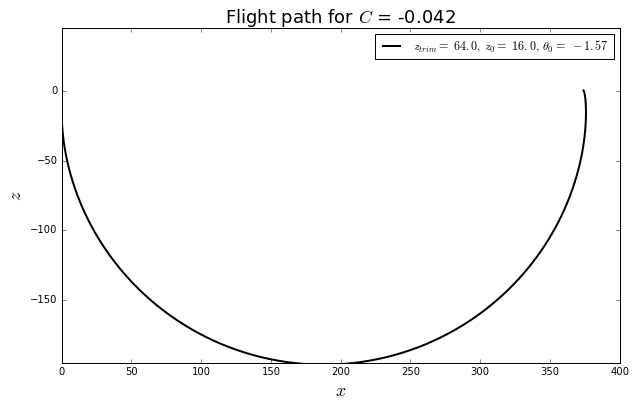

In [14]:
plot_flight_path(64,16,-numpy.pi/2)

That is so nice. We have reproduced the trajectories that Lanchester found more than a hundred years ago, painstakingly drawing them by hand with a contraption called a "trammel." It must have taken him days!

Here is how the different phugoid curves are drawn in von Kármán's book, _Aerodynamics_ (1957). He never says _how_ he drew them, but we're guessing by hand, also. We did pretty good!

![Image](./figures/vonKarman-phugoids.png)

#### Figure 5. Phugoid curves in von Kármán (1957).

In the next notebook of this series, we'll look at the differential equation that arises when you consider small perturbations on the horizontal phugoid, and we'll learn to numerically integrate that to get the flight paths.

## References

1. Lanchester, F. W. _Aerodonetics_, D. van Nostrand Company: New York, 1909. On the public domain. [Get it from Google Books](http://books.google.com/books?id=6hxDAAAAIAAJ&pg=PP1#v=onepage&q&f=false).

2. Milne-Thompson, L. M. _Theoretical Aerodynamics_, Dover 2012 reprint of the revised 1966 edition. [Read on Google Books](http://books.google.com/books?id=EMfCAgAAQBAJ&lpg=PP1&pg=PP1#v=onepage&q&f=false) (see section 18.5)

3. Sinha, N. K. and Ananthkrishnan, N. _Elementary Flight Dynamics with an introduction to Bifurcation and Continuation Methods_, CRC Press, 2013. [Read on Google Books](http://books.google.com/books?id=yXL6AQAAQBAJ&lpg=PP1&pg=PP1#v=onepage&q&f=false) (see chapter 5)

4. von Kármán, T. _Aerodynamics_, Dover 2004 reprint of the 1957 2nd edition. (see pages 149–151)

5. http://jedismedicine.blogspot.com/2013/11/flying-angle-of-attack-aviation.html

6. http://airfactsjournal.com/2015/04/archives-leighton-collins-angle-attack-1965/
7. http://www.niquette.com/puzzles/revcrses.htm
8. https://en.wikipedia.org/wiki/Centrifugal_force
9. https://en.wikipedia.org/wiki/Radius_of_curvature_%28mathematics%29
10. https://en.wikipedia.org/wiki/Osculating_circle
11. http://www.engineeringtoolbox.com/centripetal-acceleration-d_1285.html
12. https://en.wikipedia.org/wiki/Weight
13. https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion
